In [7]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
print(keras.backend.__name__, keras.__version__)

import matplotlib.pyplot as plt

tensorflow_core.keras.backend 2.2.4-tf


In [2]:
import numpy as np

conv0 = keras.layers.Conv2D(filters=25, kernel_size=7, padding="same")
conv0.build((None,300,300,1))
K.set_value(conv0.weights[0], np.load("gabor_serre.npy").transpose([2,3,1,0]))
conv0.trainable = False 
conv1 = keras.layers.Conv2D(filters=9, kernel_size=19, padding="same")
bn1 = keras.layers.BatchNormalization()
conv2 = keras.layers.Conv2D(filters=9, kernel_size=19, padding="same")
bn2 = keras.layers.BatchNormalization()
conv3 = keras.layers.Conv2D(filters=9, kernel_size=19, padding="same")
bn3 = keras.layers.BatchNormalization()
conv4 = keras.layers.Conv2D(filters=9, kernel_size=19, padding="same")
bn4 = keras.layers.BatchNormalization()
conv5 = keras.layers.Conv2D(filters=9, kernel_size=19, padding="same")
bn5 = keras.layers.BatchNormalization()
conv6 = keras.layers.Conv2D(filters=9, kernel_size=19, padding="same")
bn6 = keras.layers.BatchNormalization()
conv7 = keras.layers.Conv2D(filters=9, kernel_size=19, padding="same")
bn7 = keras.layers.BatchNormalization()
conv8 = keras.layers.Conv2D(filters=2, kernel_size=1)
bn8 = keras.layers.BatchNormalization()
pool = keras.layers.MaxPool2D(pool_size=(300,300))
fc = keras.layers.Dense(units=2)

In [3]:
in_x = keras.layers.Input(shape=(300,300,1))
x = conv0(in_x)
x = K.pow(x, 2)
x = K.relu(bn1(conv1(x)))
x = K.relu(bn2(conv2(x)))
x = K.relu(bn3(conv3(x)))
x = K.relu(bn4(conv4(x)))
x = K.relu(bn5(conv5(x)))
x = K.relu(bn6(conv6(x)))
x = K.relu(bn7(conv7(x)))
x = bn8(conv8(x))
x = pool(x)
x = K.reshape(x, (-1, 2))
out = fc(x)

model = keras.Model(inputs=in_x, outputs=out)
model.compile(optimizer='adam', loss=['binary_crossentropy'])

In [4]:
model.build((None,300,300,1))
model.load_weights("models/ff_s19/model_e2.h5")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 300, 25)      1250      
_________________________________________________________________
tf_op_layer_Pow (TensorFlowO [(None, 300, 300, 25)]    0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 9)       81234     
_________________________________________________________________
batch_normalization (BatchNo (None, 300, 300, 9)       36        
_________________________________________________________________
tf_op_layer_Relu (TensorFlow [(None, 300, 300, 9)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 300, 300, 9)       29250 

In [5]:
from data_generator import DataGenerator_Pathfinder
gen = DataGenerator_Pathfinder("/Users/gcodes/Downloads/code/pathfinder_full/baseline/", batch_size=4)

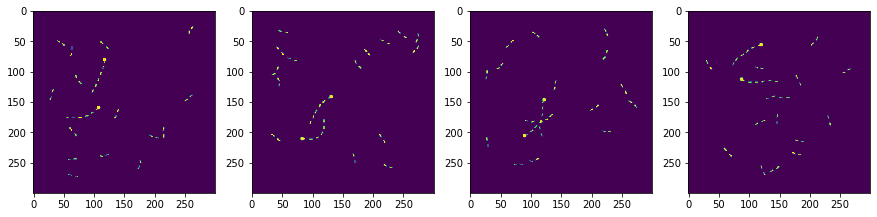

0


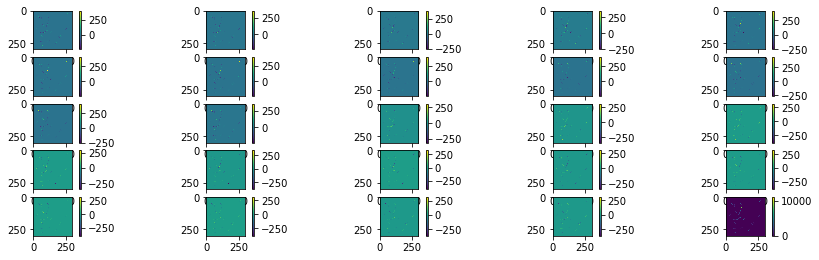

1


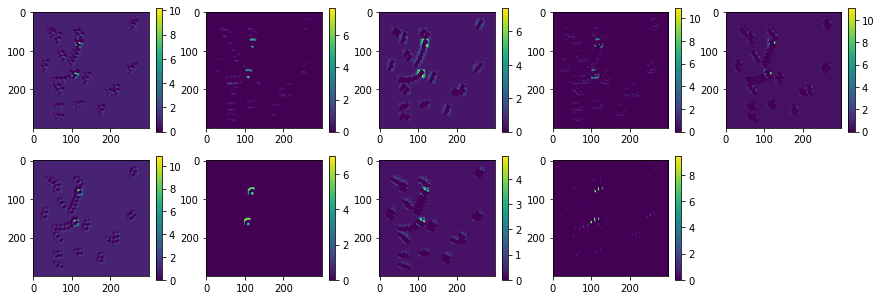

2


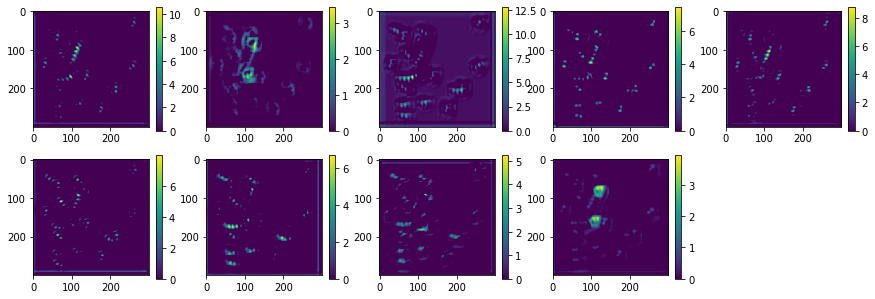

3


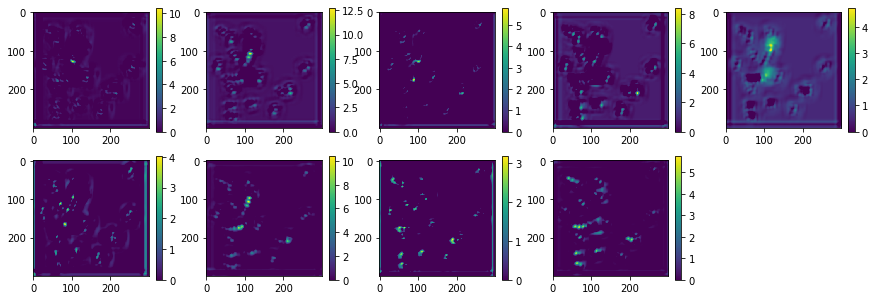

4


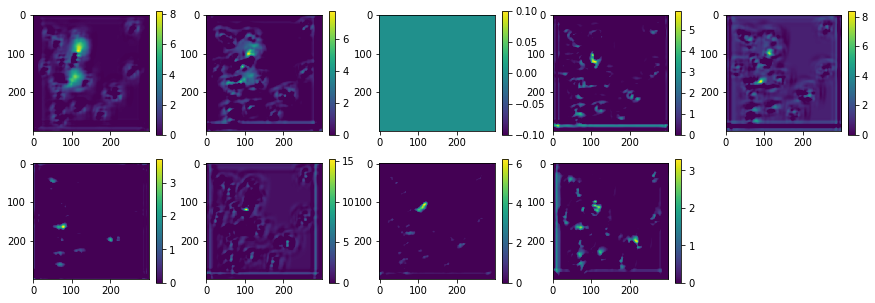

5


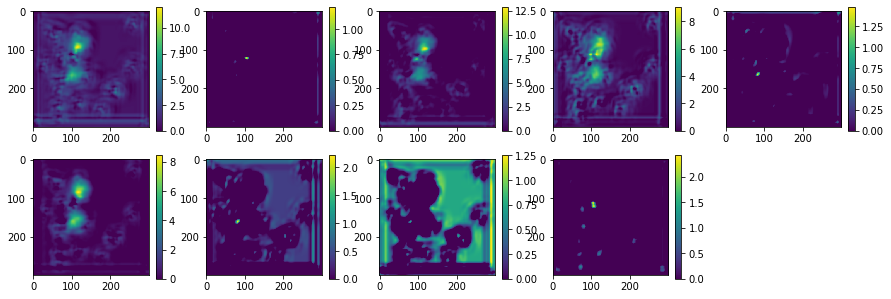

6


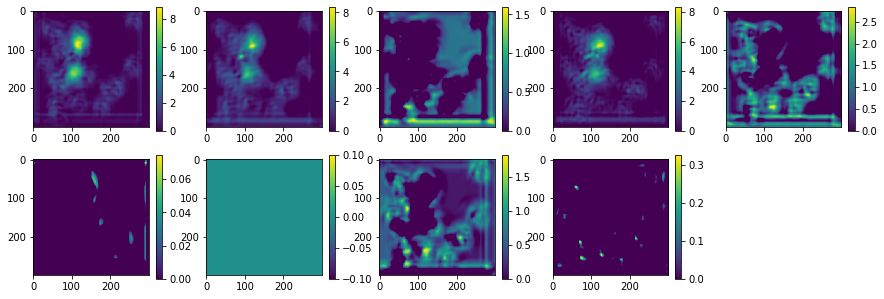

7


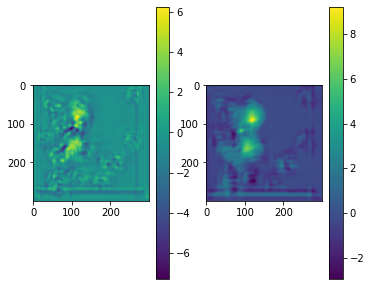

tf.Tensor(
[[ 7.3129716  -2.3104284 ]
 [ 6.91147    -2.9731054 ]
 [ 5.4097958  -0.96862817]
 [ 7.312839   -3.1736763 ]], shape=(4, 2), dtype=float32)


In [16]:
layers = ["conv2d",
          "tf_op_layer_Relu", 
          "tf_op_layer_Relu_2", 
          "tf_op_layer_Relu_3",
          "tf_op_layer_Relu_4",
          "tf_op_layer_Relu_5",
          "tf_op_layer_Relu_6",
          "batch_normalization_7"]

xb = gen.__getitem__(100)[0]
plt.figure(figsize=(15,5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(xb[i].squeeze())
plt.show()

idx = 0
for j in range(len(layers)):
    print(j)
    model_int = keras.Model(inputs=model.input, outputs=model.get_layer(layers[j]).output)
    res = K.eval(model_int(xb))
    plt.figure(figsize=(15,5))
    for i in range(res.shape[-1]):
        plt.subplot(1+res.shape[-1]//5,5,i+1)
        try:
            plt.imshow(res[idx,:,:,i])
        except:
            pass
        plt.colorbar()
    plt.show()

print(model(xb))

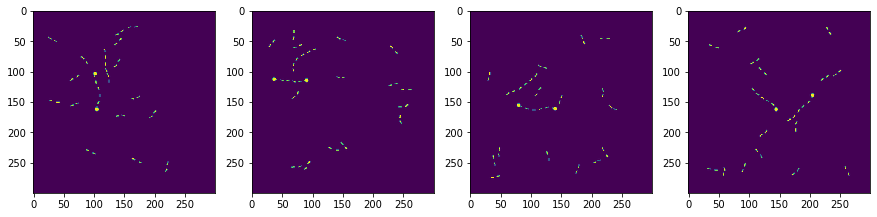

(4, 300, 300, 9)

In [29]:
import matplotlib.pyplot as plt

xb = gen.__getitem__(100)[0]
plt.figure(figsize=(15,5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(xb[i][:,:,0])
plt.show()

res = K.eval(model_int(xb))

plt.figure(figsize=(15,7))
for i in range(9):
    plt.subplot(2,5,i+1)
    plt.imshow(res[3,:,:,i])
    plt.colorbar()
plt.show()
# for j in range(1,8):
#     print(j)
#     plt.figure(figsize=(15,15))
#     for i in range(25):
#         plt.subplot(5,5,i+1)
#         plt.imshow(bn_res[0,j,:,:,i] - bn_res[0,j-1,:,:,i])
#         plt.colorbar()
#     plt.show()

In [17]:
model.layers

0 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe700192ed0>


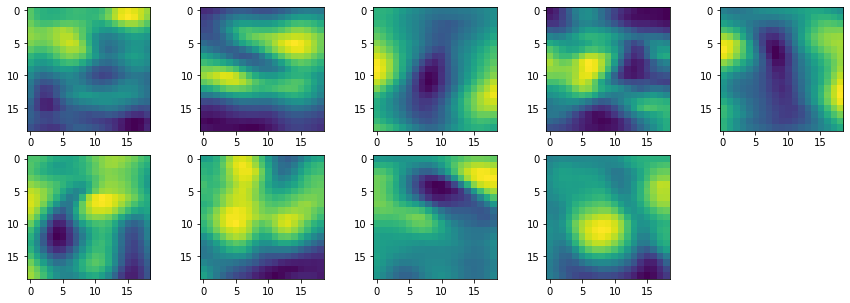

1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe6f00ab610>


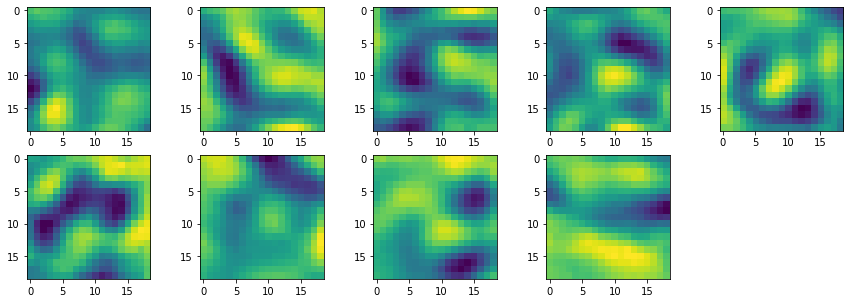

2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe711a69290>


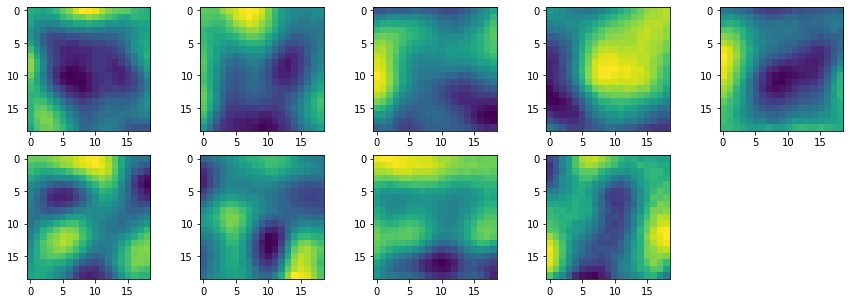

3 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe700192a10>


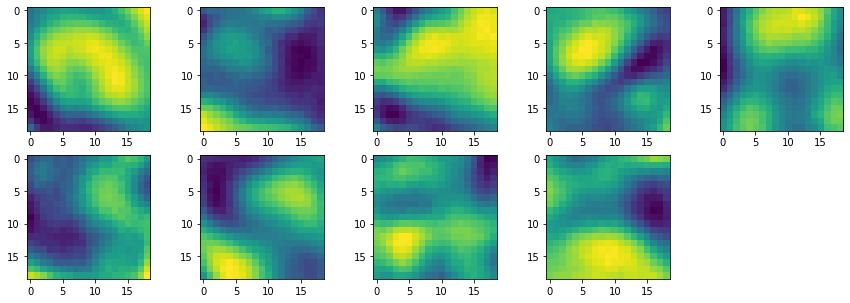

4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe711a6e410>


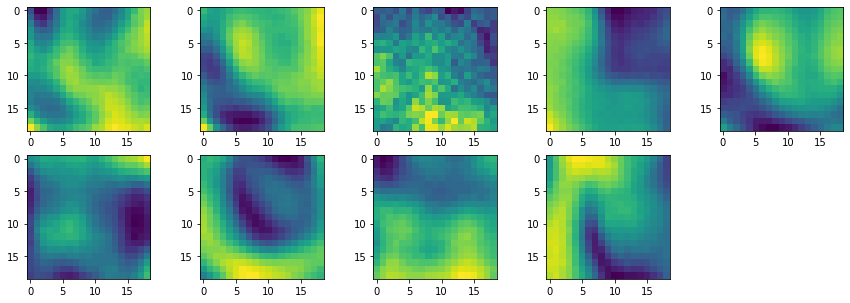

5 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe711a6ed10>


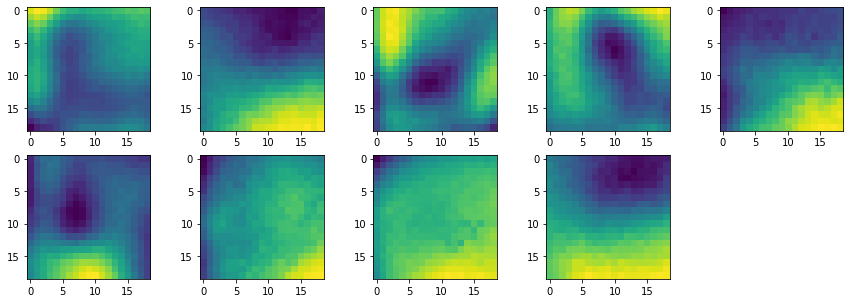

In [28]:
import matplotlib.pyplot as plt
for j in range(6):
    print(j, model.layers[3+3*j])
    plt.figure(figsize=(15,5))
    for i in range(9):
        plt.subplot(2,5,i+1)
        plt.imshow(K.eval(model.layers[3+3*j].weights[0][:,:,0,i]))
    plt.show()